# Polytropes and Stars

## Authors
B.W. Holwerda

Inspired by work by Dr. Pauline Barmby on white Dwarfs, the computational assignments by Dr. Zingale (whose code appears later here) and discussions with Dr. Saavik Ford. How to introduce Polytropes, the Lane-Emden equation for a 300 level class. 


## Learning Goals
* Familiarize yourself with the Lane-Emden Equation
* The effect of the equation of state
* Application to different stellar populations.
  
## Keywords


## Companion Content

Not in Ryden & Peterson

Not in Carroll & Ostlie

## Summary
What is the density profile of different kinds of stars? To model these, we will turn to which *equation of state* governs their interiors. Reviewing main sequence, white dwarf and neutron stars, as well as rocky and gas giant planets. 

<hr>


## Student Name and ID:



## Date:

<hr>

# Hydrostatic Equilibrium

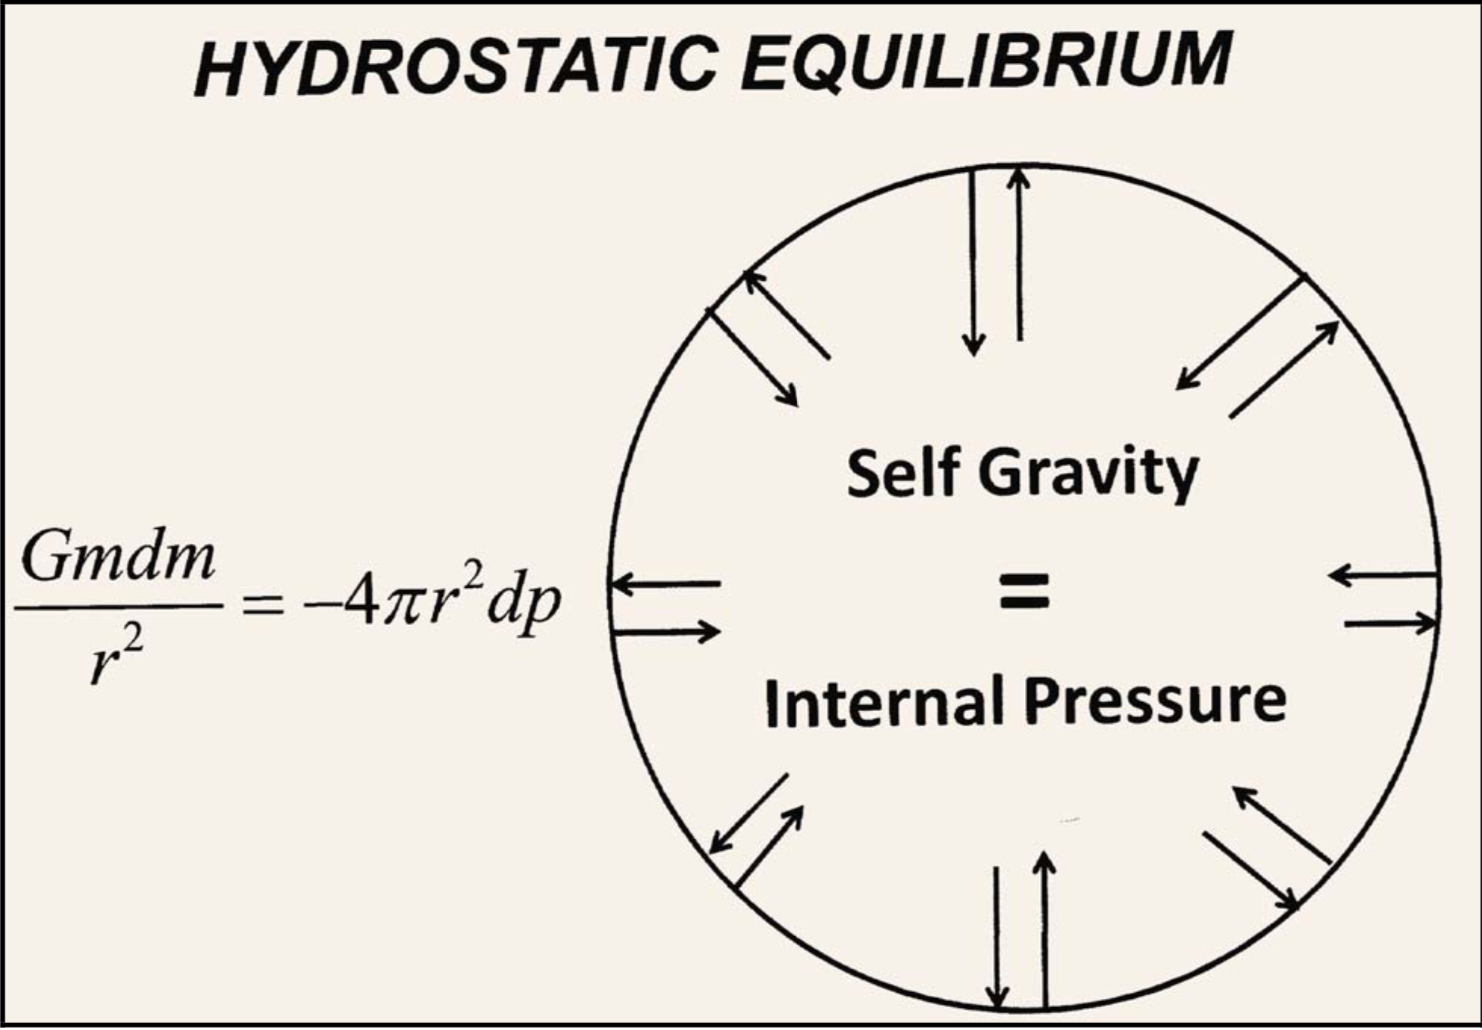

Most stars are objects in hydrostatic equilibrium. At all points within a star, the pressure gradient supports the weight of the overlying layers. If $P(r)$ and $\rho(r)$ are the gas pressure and density at point $r$, and $m(r)$ is the mass within the sphere of radius r, then the equation of hydrostatic equilibrium is

$$ {dP \over dr} = - {G M \rho \over r^2} \ \ \ \ \ (1)$$

This can be supplemented by the definition of $m(r)$ which, written in differential form, is

$$ {dm \over dr} =  4 \pi r^2 \rho \ \ \ \ \ (2)$$

The material that the stars have an equation of state of the form $P(\rho)$ which means that we have three equations for three unknown functions, $P(r)$, $\rho(r)$ and $m(r)$. Using an equation of state of the form $P(\rho)$ we can eliminate the pressure from the hydrostatic equation via:

$$ {dP \over dr} = \left({dP \over d\rho}\right) \left({ d\rho \over dr} \right) \ \ \ \ \ (3)$$

This gives:

$$ {d\rho \over dr} = - \left({dP \over d\rho}\right)^{-1} {Gmρ \over r^2} \ \ \ \ \ (4)$$

As the equation of state explicitly gives $(dP/d\rho)$, Equations (2) and (4) are two coupled, first-order ordinary differential equations that can be solved given appropriate boundary conditions. 

So we need:

* an equation of state, i.e. an relation between Pressure (P) and density ($\rho$)
* boundary conditions, i.e. $\rho(r=R_{star}) = 0$ (star stops at its radius), $m(r=0) = 0$ (at zero radius there is no mass) and $\rho(r=0) = \rho_c$, there is a central density.

The equation of state for different stars is different based on the conditions. There are

* **Ideal Gas Stars** i.e ``normal'' stars like our Sun on the Main Sequence. For the equation of state, we can use the Ideal Gas relation:

  $$ P_g = {\rho \over \mu} R_g T  \ \ \ \ \ (5)$$

  where $R_g$ is the gas constant, $\mu$ the average atomic weight of the gas.

* **Degenerate Stars** i.e. those that are no longer held up by the high temperature of an ideal gas but the degeneracy of the atoms.

  $$ P_g = K_1 \left( {\rho \over \mu_E}\right)^{5/3}  \ \ \ \ \ (6) $$

  where $K_1 = {h^2 \over 20 m_e m_H}\left({3 \over \pi m_H}\right)^{2/3}$, a complex constant.

* **Relativistically Degenerate Stars** where the mass and pressures become such that

  $$ P_g = K_2 \left( {\rho \over \mu_E}\right)^{4/3}   \ \ \ \ \ (7)$$

  where $K_2$ is a different constant for *relativistic degeneracy*.



# Polytropes


The combined assumptions of mass conservation and hydrostatic equilibrium lead to a relation
between pressure and mass density in a star (combining equations 2 and 4 earlier):
$$
-4\pi G \rho = {1 \over r^2} {d \over dr} \left( {r^2 \over \rho} {dP \over dr} \right) \ \ \ \ \ (7)
$$
This is a single equation in two unknowns, $P$ and $\rho$. To integrate this equation to find $P(r)$ and $\rho(r)$, we need to assume an equation of state that tells us $P$ as a function of $\rho$. We have the equations for ideal gas, denergate gas and relativistically degenerate gas (5, 6 and 7 respectively). 

To generalize it further we consider the **Polytropic Equation of State**:
$$
P = K_n \rho^{1+1/n}
$$
where $n$ is the **polytropic index**. This index is what sets the equation of state that allows to model different interiors. For example, from Wikipedia:

* **n = 0** rocky planets.
* **0.05 < n <1** Neutron stars 
* **n = 1.5** fully convective star cores (Red Giants), brown dwarfs, giant gaseous planets (like Jupiter) or low-mass white dwarfs (non-relativistic degenerate).
* **n = 3** higher masses white dwarfs (relativistically degenerate)
* **$n = \inf$** - the isothermal self-gravitating sphere of gas, a collisionles system such as a globular cluster (constant temperature). 

# Lane-Emden Equation

The differential equation for $P$ and $\rho$ for polytropic equiations of state can be recast in dimensionless form as the **Lane-Emden Equation** given a polytropic index $n$:

$${1 \over \xi^2} {d \over d\xi} \left( \xi^2 {d\theta \over d\xi} \right) = - \theta^n$$

where $\xi$ is a dimensionless radius and $\theta$ is a dimensionless density. The relation with $\xi$ and $\theta$ to radius and density are:
$$ r = \left[ {K(n+1)\rho_0^{(1/n)-1} \over 4 \pi G } \right]^{1/2} \xi $$
so this conversion depends on the state ($n$). The conversion from $\theta$ can be found from the Lane-Emden and the border values (at the center ($\rho_0$) and the edge of the object and ($\rho=0$). 

The Lane-Emden Equation has no general analytic solutions (just for n=1.5 and n=3) and any other value of $n$ must be solved numerically. We pre-compute the models shown here.

In [14]:
# solution blatantly perloined from https://zingale.github.io/comp_astro_tutorial/stars/lane-emden.html

# importing what we need
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import numpy.linalg
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15



class Polytrope:
    """a polytrope of index n"""
    def __init__(self, n , h0=1.e-2, tol=1.e-12):
        self.n = n
        self.xi = []
        self.theta = []
        self.dtheta_dxi = []
        
        self._integrate(h0, tol)

    def _integrate(self, h0, tol):
        """integrate the Lane-Emden system"""

        # our solution vector q = (y, z)
        q = np.zeros(2, dtype=np.float64)
        xi = 0.0

        h = h0

        # initial conditions
        q[0] = 1.0
        q[1] = 0.0

        while h > tol:
            # 4th order RK integration -- first find the slopes
            k1 = self._rhs(xi, q)
            k2 = self._rhs(xi+0.5*h, q+0.5*h*k1)
            k3 = self._rhs(xi+0.5*h, q+0.5*h*k2)
            k4 = self._rhs(xi+h, q+h*k3)

            # now update the solution to the new xi
            q += (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
            xi += h

            # set the new stepsize--our systems is always convex
            # (theta'' < 0), so the intersection of theta' with the
            # x-axis will always be a conservative estimate of the
            # radius of the star.  Make sure that the stepsize does
            # not take us past that.
            R_est = xi - q[0]/q[1]

            if xi + h > R_est:
                h = -q[0]/q[1]

            # store the solution:
            self.xi.append(xi)
            self.theta.append(q[0])
            self.dtheta_dxi.append(q[1])

        self.xi = np.array(self.xi)
        self.theta = np.array(self.theta)
        self.dtheta_dxi = np.array(self.dtheta_dxi)

    def _rhs(self, xi, q):
        """ the righthand side of the LE system, q' = f"""

        f = np.zeros_like(q)

        # y' = z
        f[0] = q[1]
        
        # for z', we need to use the expansion if we are at xi = 0,
        # to avoid dividing by 0
        if xi == 0.0:
            f[1] = (2.0/3.0) - q[0]**self.n
        else:
            f[1] = -2.0*q[1]/xi - q[0]**self.n

        return f

    def get_params(self):
        """ return the standard polytrope parameters xi_1,
        and [-xi**2 theta']_{xi_1} """
        xi1 = self.xi[-1]
        p2 = -xi1**2 * self.dtheta_dxi[-1]
        return xi1, p2

    def plot(self):
        """ plot the solution """
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(self.xi, self.theta, label=r"$\theta$")
        ax.plot(self.xi, self.theta**self.n, label=r"$\rho/\rho_c$")
        ax.set_xlabel(r"$\xi$")
        ax.legend(frameon=False)
        return fig

    def massradiusplot(self):
        """ plot the solution """
        rho0=(9.74*10**5 )/150.
        #fig = plt.figure()
        # ax = fig.add_subplot(111)
        #ax.plot(self.xi, self.theta, label=r"$\theta$")
        #ax.plot(self.xi, self.theta**self.n, label=r"$\rho/\rho_c$")
        self.mass = np.zeros(len(self.xi))
        for i in range(len(self.xi)):
            self.mass[i] = np.sum(4.*np.pi*(self.theta[:i]**self.n)*self.xi[:i]**3)
        self.mass = self.mass/np.max(self.mass)
        self.xi = self.xi/np.max(self.xi)
        #mu_e = 2
        # convert to cgs
        #self.mass = self.mass*5.67e33/(mu_e**2)
        #self.xi = self.xi*7.72e8/mu_e
        # convert to solar units
        #self.mass = self.mass/2e33
        #self.mass = self.mass/6.957e10
        
        plt.plot(self.xi, self.mass, label=r"n=%2.1f" % self.n)
        plt.xlabel(r"Normalized Radius")
        plt.ylabel(r"Normalized Mass")
        plt.legend(frameon=False)
        return fig


    def model_final(mass, radius, mu_e = 2):
        # convert to cgs
        m_phys = mass*5.67e33/(mu_e**2)
        r_phys = radius*7.72e8/mu_e
        # convert to solar units
        m_phys = m_phys/2e33
        r_phys = r_phys/6.957e10
        return(m_phys, r_phys)


### Plotting the mass-radius for a given polytrope

Below is an example the mass-radius for n=1.5. The mass-radius relation is *normalized* to mininum and maximum value of the population. ?

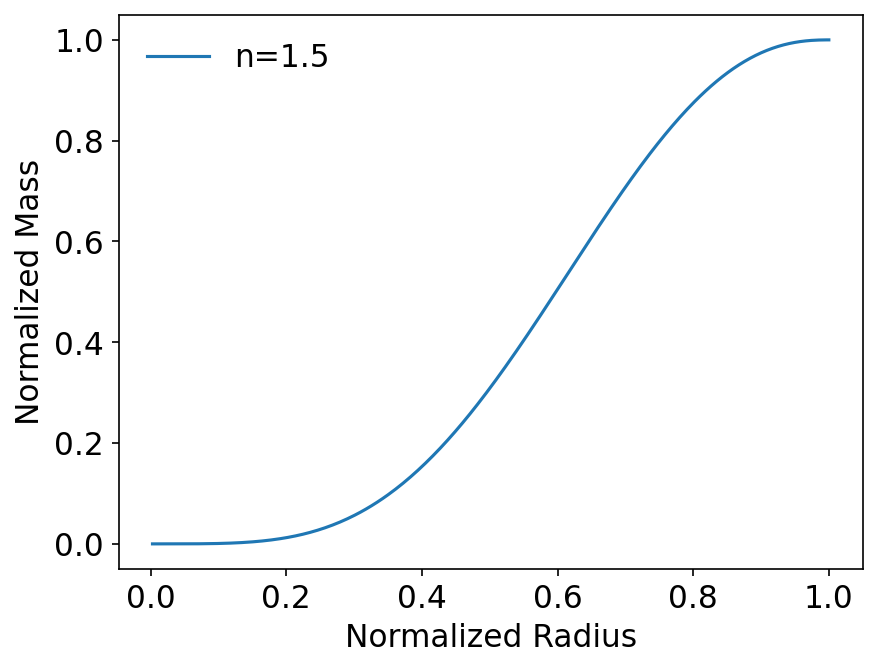

In [16]:
p15 = Polytrope(1.5)
fig = plt.figure()
p15.massradiusplot()
plt.show()

### Exercise 1

Plot the mass-radius relations from the polytropes n=0,1,1.5,2 and 3. 

In [20]:
# student work here


# Polytropes

We are going to compare the polytrope mass-radius relations to the *normalized* distribtions.
First, using the information above, we set an expectation which order polytrope these will behave as (pick the n). 
And then we compare the above plot to the normalized (divided by the largest value, using np.max()). 

# Main Sequence Stars

First we try to compare the masses and radii of "normal" star, those on the main sequence. 

We get the masses and radii from binaries:
https://ui.adsabs.harvard.edu/abs/2010A%26ARv..18...67T/abstract



In [24]:
from astropy.io import ascii
ms = ascii.read('ms.csv', format='csv', fast_reader=False)

### Exercise 2

Plot the mass-radius relations from the polytropes n=0,1,1.5,2 and 3 and compare against the normalized radius-mass plot of the main sequence stars 

In [27]:
# student work here


### Exercise 3

Evaluate your plot and the normalized Polytropes. Do these follow a single polytrope? Look back and see where they are and how it compares to the expectations. 

*student written answer here*

# White Dwarfs

White dwarfs are degenerate objects. This sets up an expectation for the appropriate polytrope. 

In [32]:
from astropy.io import ascii
wd = ascii.read('wd_data.csv', format='csv', fast_reader=False)


### Exercise 4

Plot the mass-radius relations from the polytropes n=0,1,1.5,2 and 3 and compare against the normalized radius-mass plot of the white dwarfs. The maximum theoretical mass for a white dwarf is the 1.44 Chandresekar limit and that most massive white dwarf's radius is 0.04. Use these values to normalize the White Dwarf values. 

In [35]:
# student work here


# Neutron Stars

Finally, we try for those neutron stars we have masses and radii for. This is particularly difficult since their radii are very small.

https://arxiv.org/abs/1805.11581
and 
https://www.sciencedirect.com/science/article/pii/S2666032625000614

only gets us five values. 

### Exercise 5

Evaluate your plot and the normalized Polytropes. Do these follow a single polytrope? Look back and see where they are and how it compares to the expectations. 

In [39]:
# neutron star radii and masses
r = np.asarray([10.8,  10.7, 13.02, 12.35, 11.9])
m = np.asarray([1.255, 1.49,  1.44,  2.08,  2.3])
# student work here



### Exercise 6

Evaluate your plot and the normalized Polytropes. Do these mostly follow a single polytrope? Look back and see where they are and how it compares to the expectations. 

*student written answer here*

### Solar System; rocky planets and gas giants 

We have two more (small) populations for which we have masses and radii; the rocky and gas planets of the solar system. 
We will compare both to the Polytropes here.

In [44]:
ss = ascii.read('solar_system.csv', format='csv', fast_reader=False)

rp = ss[:3] 
gp = ss[4:]


ss

﻿planet,mass,radius,distance
str7,float64,int64,float64
Mercury,3.28e+23,2439,0.4
Venus,4.87e+24,6052,0.7
Earth,5.97e+24,6380,1.0
Mars,6.3e+23,3400,1.5
Jupiter,1.89e+27,71500,5.2
Saturn,5.68e+26,60300,9.5
Uranus,8.68e+25,25500,19.0
Neptune,1.02e+26,24800,30.0


### Exercise 7

First, we have split the solar system data in rocky planets and gas planets (using the slicing index) above and plot rocky planets and gas planets *separately* over the polytrope mass-radius plots. Make sure to normalize each by their maximum. Start with the rocky planets

In [49]:
# student work here


### Exercise 8

What was the expectation for the Polytrope that describes rocky planets best? Does it fit?

*student written answer here*

### Exercise 9

Now plot the gas giants. Let us assume that the maximum size of gas giants is about twice that of Jupiter in both mass and radius. 
Do these land on the appropriate Polytrope?

In [51]:
# student work here


### Exercise 10

Evaluate how well Polytropes describe the stars and planets in the Universe we have masses and radii for. Does it fit perfectly? Or are there details that may need explainations? Look at the assumptions that went in, which is likely not completely true?

*student written answer here*

<hr>